In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scripts.utils import prepare_hd5_input

/Users/andrewhsu/Projects/REU-2025/REU/.venv/lib/python3.13/site-packages/sorted_nearest/__init__.py:1: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


In [3]:
gm_enhancer_genes = pd.read_csv("data/GM12878_enhancer_gene_links_100kb.hg38.tsv", sep="\t")
k5_enhancer_genes = pd.read_csv("data/K562_enhancer_gene_links_100kb.hg38.tsv", sep="\t")

gm_gene_tss = pd.read_csv("data/ABC-multiTSS_nominated/GM12878/Neighborhoods/GeneList.txt", sep="\t")[["name", "Ensembl_ID", "chr", "tss", "strand", "H3K27ac.RPM.TSS1Kb", "DHS.RPM.TSS1Kb"]] 
gm_gene_tss["ENSID"] = gm_gene_tss["Ensembl_ID"]

k5_gene_tss = pd.read_csv("data/ABC-multiTSS_nominated/K562/Neighborhoods/GeneList.txt", sep="\t")[["name", "Ensembl_ID", "chr", "tss", "strand", "H3K27ac.RPM.TSS1Kb", "DHS.RPM.TSS1Kb"]]
k5_gene_tss["ENSID"] = k5_gene_tss["Ensembl_ID"]

gm_enhancer_genes_include = gm_enhancer_genes.merge(gm_gene_tss, left_on="TargetGeneEnsembl_ID", right_on="Ensembl_ID", how="right", suffixes=["", "_gene"]).reset_index()
k5_enhancer_genes_include = k5_enhancer_genes.merge(k5_gene_tss, left_on="TargetGeneEnsembl_ID", right_on="Ensembl_ID", how="right", suffixes=["", "_gene"]).reset_index()

In [4]:
enhancer_genes = [gm_enhancer_genes, k5_enhancer_genes]
gene_tss = [gm_gene_tss, k5_gene_tss]
enhancer_genes_include = [gm_enhancer_genes_include, k5_enhancer_genes_include]

In [5]:
def multi_tss(dict, enhancer_gene, gene, chrom):
    for key in dict.keys():
        tss = enhancer_gene[enhancer_gene["TargetGeneEnsembl_ID"].str.contains(gene)]["TargetGeneTSS"].unique()
        df = dict[key][
            (dict[key][0] == chrom) &
            (dict[key][7] > tss.min()) &
            (dict[key][8] < tss.max() + 100)
        ].drop_duplicates(subset=[7])

        try:
            gene_strand = df.iloc[0, 5]
            rna_signal = df[[9]]
            new_index = df[7].values
            rna_signal = rna_signal.set_index(new_index).reindex(list(range(tss.min(), tss.max() + 1000)), fill_value=0)
            if gene_strand == "-":
                rna_signal = rna_signal[::-1]

            if np.max(rna_signal) > 1:
                fig, ax = plt.subplots()
                fig.set_size_inches(20, 2)
                ax.plot(list(range(tss.min(), tss.max() + 1000)), rna_signal)
                ax.set_xticks(list(range(tss.min(), tss.max() + 1000, 1000)))

                for x in tss:
                    ax.axvline(x=x, color="grey", linestyle="--")
                    plt.text(x + 50, ax.get_ylim()[1]/10, f"{x}", rotation=90)
                
                plt.title(f"{gene}: {chrom}")
                print(f"TSSs of {gene} {key}:")
                plt.show()
        except IndexError:
            print("Gene's TSS doesn't exist.\n")
            continue

In [6]:
def overlayed_signals(dict):
    stranded = []
    plus = []
    minus = []

    for key in dict.keys():
        gm_gene_tss = pd.read_csv("data/ABC-multiTSS_nominated/GM12878/Neighborhoods/GeneList.txt", sep="\t")[["name", "Ensembl_ID", "chr", "tss", "strand", "H3K27ac.RPM.TSS1Kb", "DHS.RPM.TSS1Kb"]] 
        gm_gene_tss["ENSID"] = gm_gene_tss["Ensembl_ID"]

        gene_list_, _, _, _, _, rna_df_list = prepare_hd5_input(gm_enhancer_genes_include, num_features=3, rna_df=dict[key])

        for i, _ in enumerate(gene_list_):
            if key == "stranded":
                stranded.append(rna_df_list[i])
            elif key == "plus":
                plus.append(rna_df_list[i])
            elif key == "minus":
                minus.append(rna_df_list[i])
        
        for i, v in enumerate(gene_list_):
            fig = plt.figure()
            fig.set_size_inches(20, 2)
            plt.plot(stranded[i], label="stranded", alpha=0.6, color="aqua")
            plt.plot(minus[i], label="minus", linestyle="--", color="red")
            plt.plot(plus[i], label="plus", linestyle=":", color="black")
            plt.title(f"{v}")
            plt.legend()
            plt.show()

In [7]:
rna_dict = {}
rna_dict["unstranded"] = pd.read_csv("data/RNASeq_bw/GM12878.unstranded.ENCFF104OTO.coverage.txt", sep="\t", header=None)

In [8]:
gene_list = !grep _ data/RNA_CAGE.txt | awk 'NR > 1{print $1}'
gene_list = list(set([tss[: tss.find("_")] for tss in gene_list]))

Gene's TSS doesn't exist.

Gene's TSS doesn't exist.

TSSs of ENSG00000115271 unstranded:


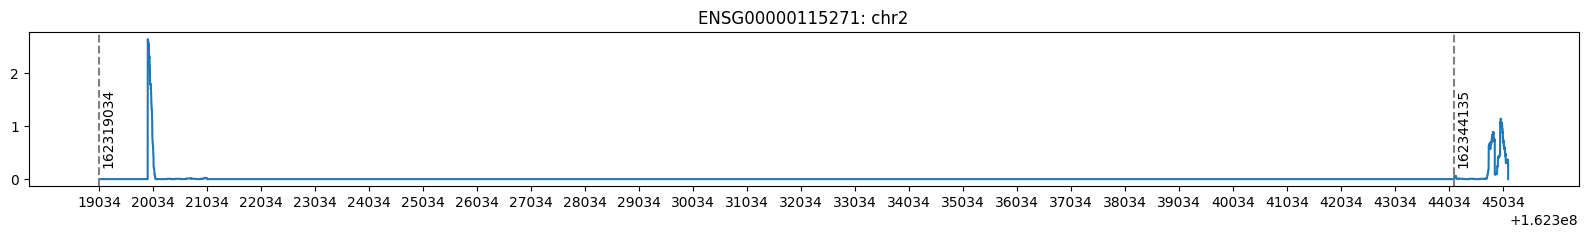

TSSs of ENSG00000143401 unstranded:


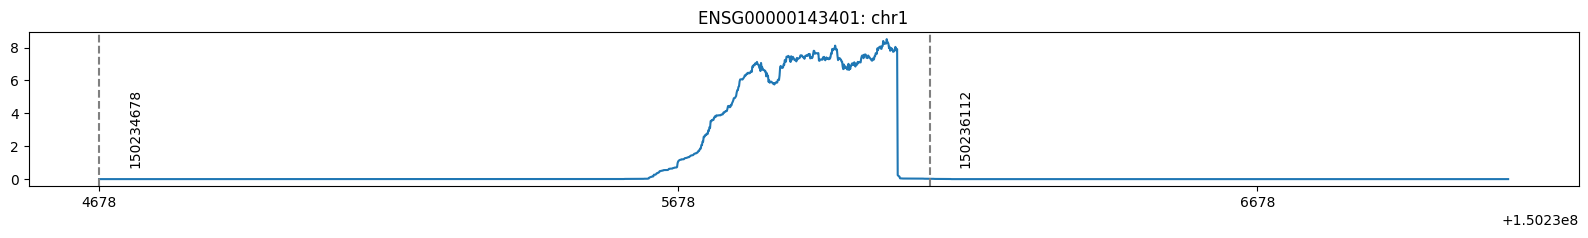

Gene's TSS doesn't exist.

TSSs of ENSG00000169567 unstranded:


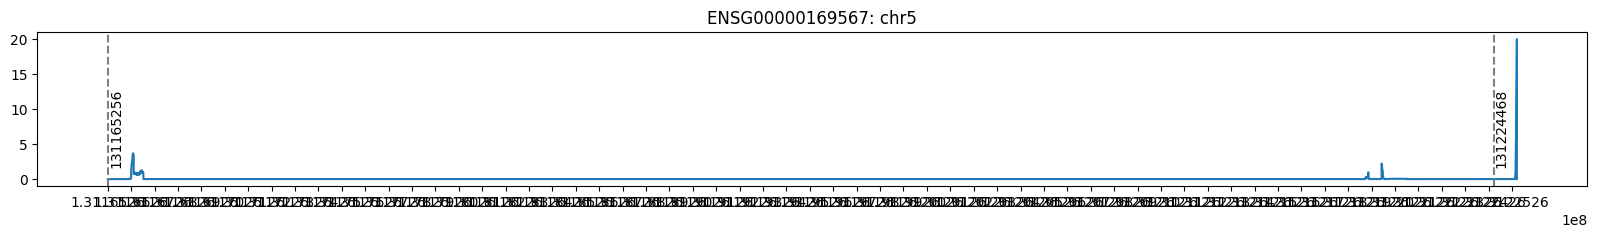

Gene's TSS doesn't exist.

TSSs of ENSG00000170634 unstranded:


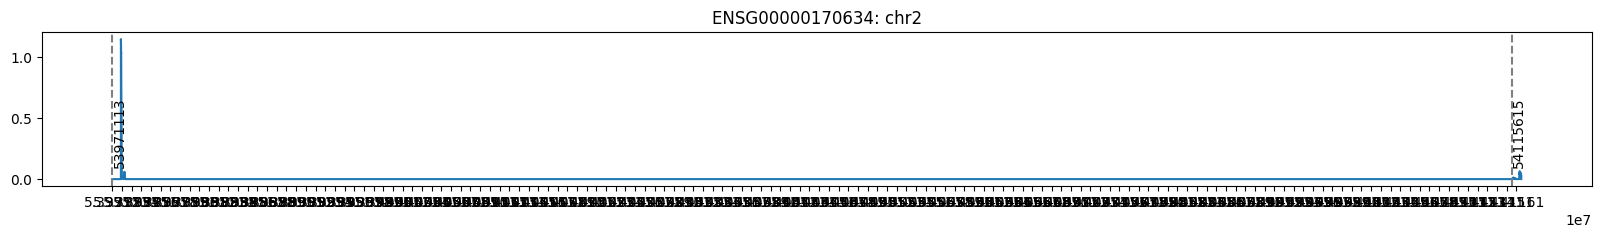

Gene's TSS doesn't exist.

Gene's TSS doesn't exist.

Gene's TSS doesn't exist.

Gene's TSS doesn't exist.

Gene's TSS doesn't exist.

Gene's TSS doesn't exist.

TSSs of ENSG00000185055 unstranded:


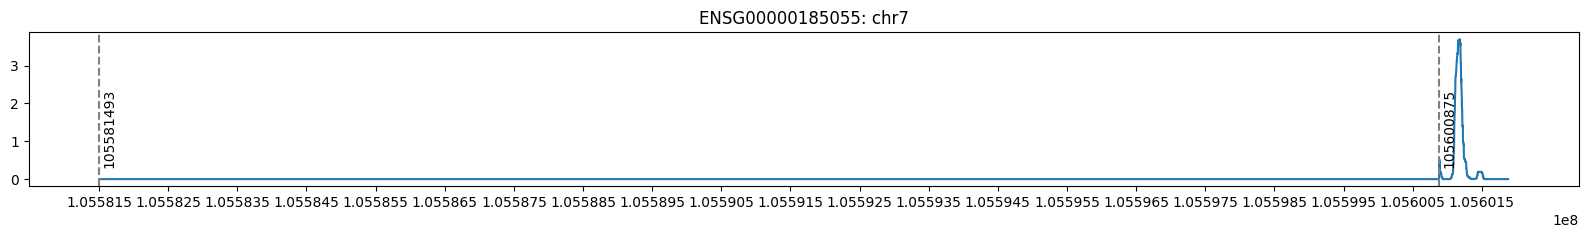

TSSs of ENSG00000088832 unstranded:


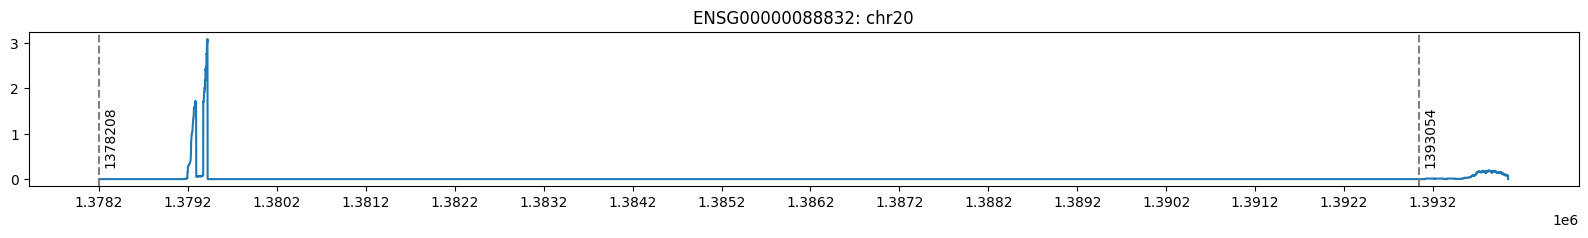

Gene's TSS doesn't exist.

Gene's TSS doesn't exist.

Gene's TSS doesn't exist.

TSSs of ENSG00000170854 unstranded:


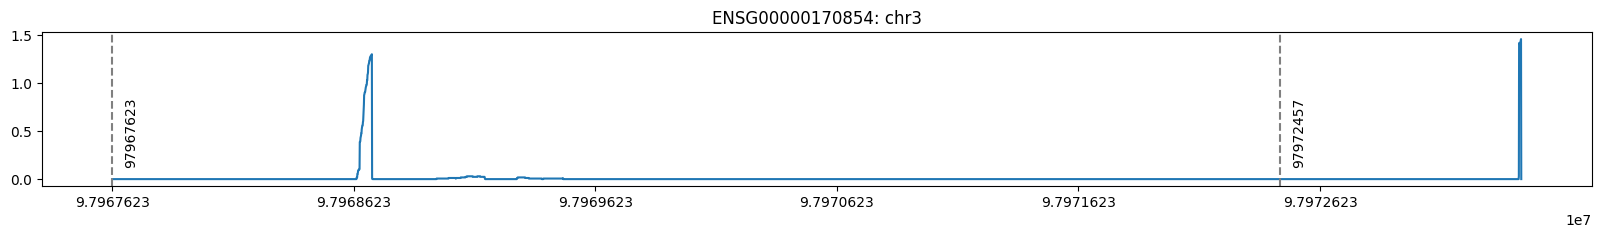

Gene's TSS doesn't exist.

TSSs of ENSG00000103194 unstranded:


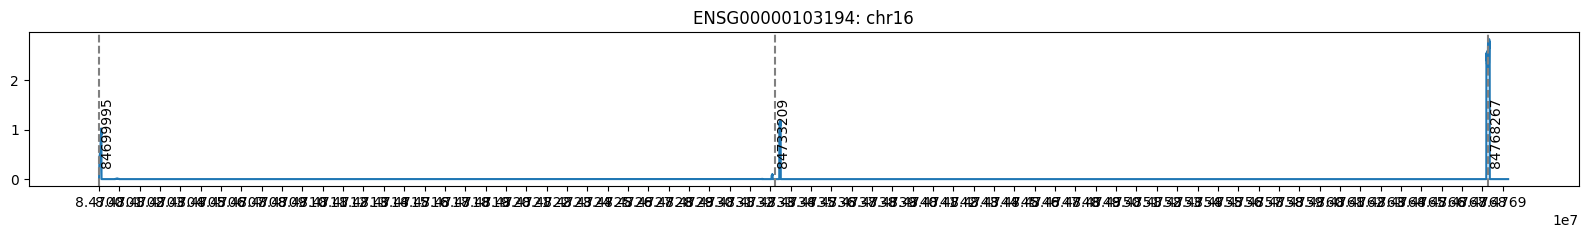

Gene's TSS doesn't exist.

TSSs of ENSG00000133313 unstranded:


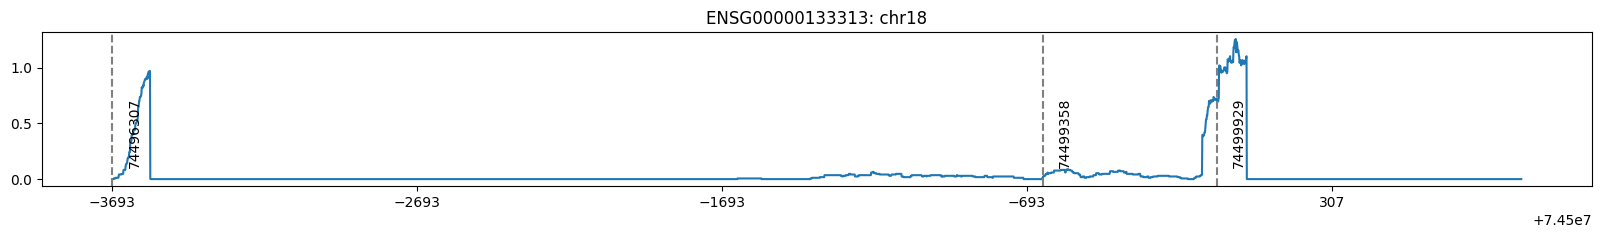

Gene's TSS doesn't exist.

TSSs of ENSG00000291075 unstranded:


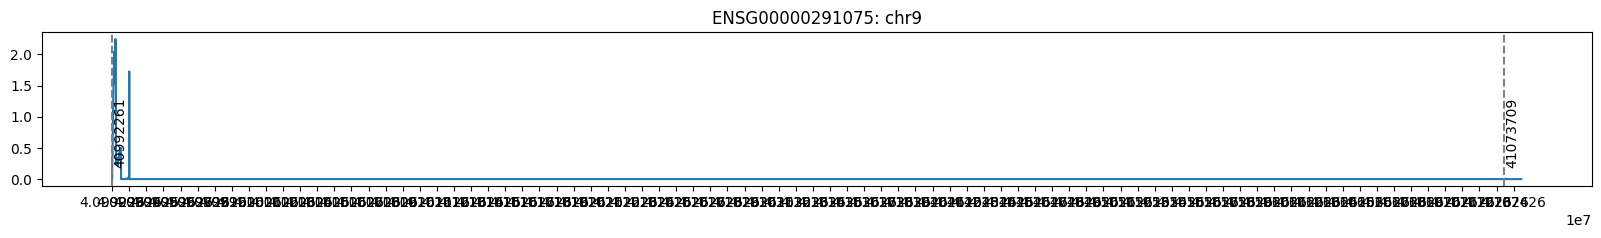

Gene does not exist.

Gene's TSS doesn't exist.

TSSs of ENSG00000053770 unstranded:


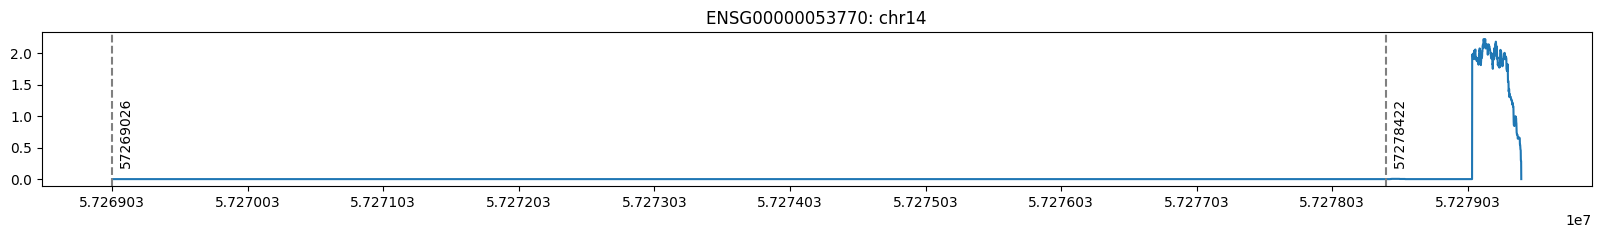

TSSs of ENSG00000173436 unstranded:


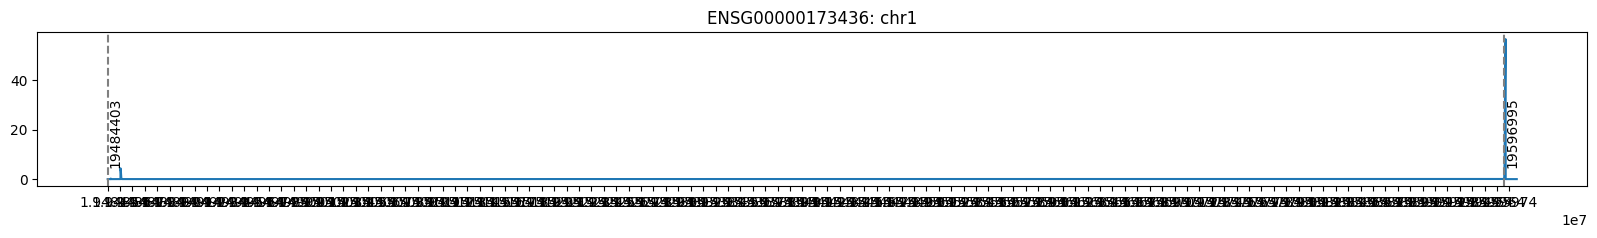

Gene's TSS doesn't exist.

Gene's TSS doesn't exist.

TSSs of ENSG00000135218 unstranded:


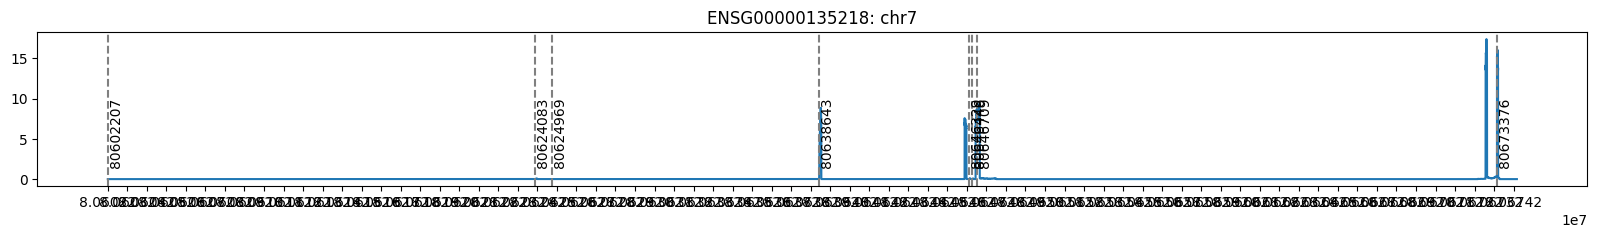

Gene's TSS doesn't exist.

Gene's TSS doesn't exist.

Gene's TSS doesn't exist.

Gene's TSS doesn't exist.

TSSs of ENSG00000198242 unstranded:


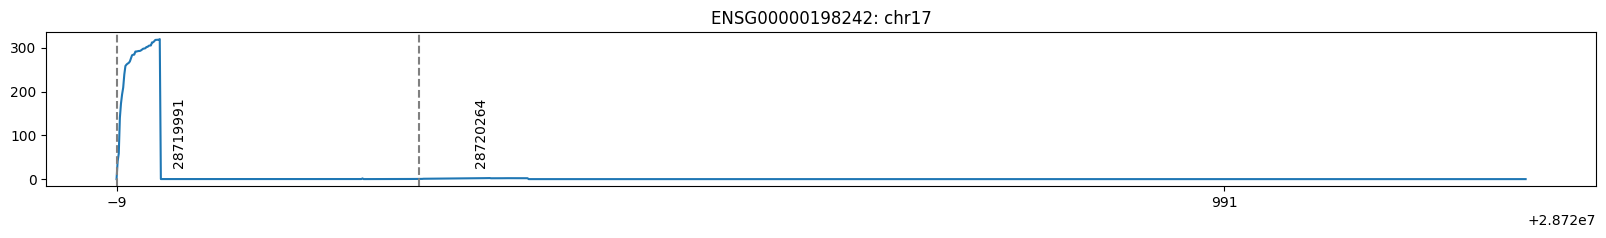

Gene's TSS doesn't exist.

Gene's TSS doesn't exist.

Gene's TSS doesn't exist.

TSSs of ENSG00000125611 unstranded:


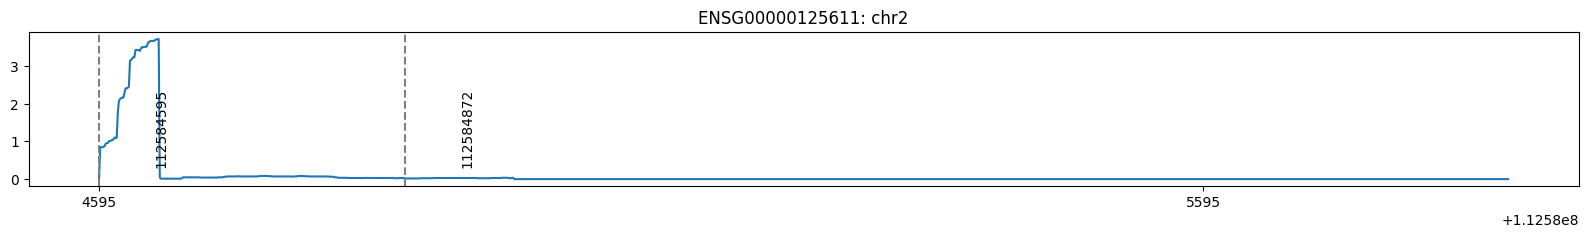

Gene's TSS doesn't exist.

Gene's TSS doesn't exist.

Gene's TSS doesn't exist.

Gene's TSS doesn't exist.

Gene's TSS doesn't exist.

Gene's TSS doesn't exist.

Gene's TSS doesn't exist.

Gene's TSS doesn't exist.

Gene's TSS doesn't exist.



In [9]:
for gene in gene_list[0:100]:
    try:
        chrom = gm_enhancer_genes[gm_enhancer_genes["TargetGeneEnsembl_ID"].str.contains(gene)][["chr"]].drop_duplicates().iloc[0, 0]
    except IndexError:
        print("Gene does not exist.\n")
        continue
    multi_tss(rna_dict, gm_enhancer_genes, gene, chrom)

Gene's TSS doesn't exist.

Gene's TSS doesn't exist.

TSSs of ENSG00000115271 unstranded:


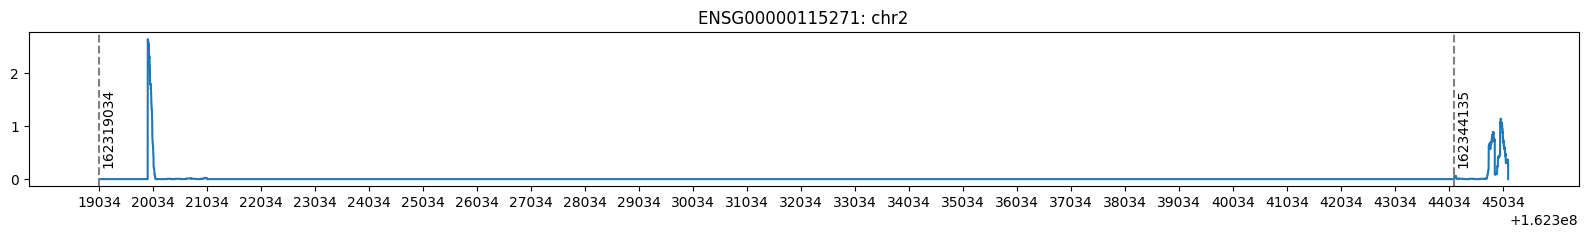

TSSs of ENSG00000143401 unstranded:


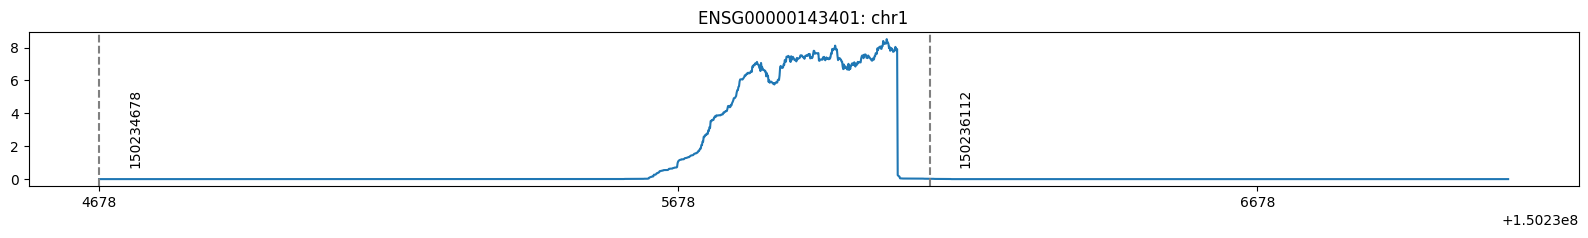

Gene's TSS doesn't exist.

TSSs of ENSG00000169567 unstranded:


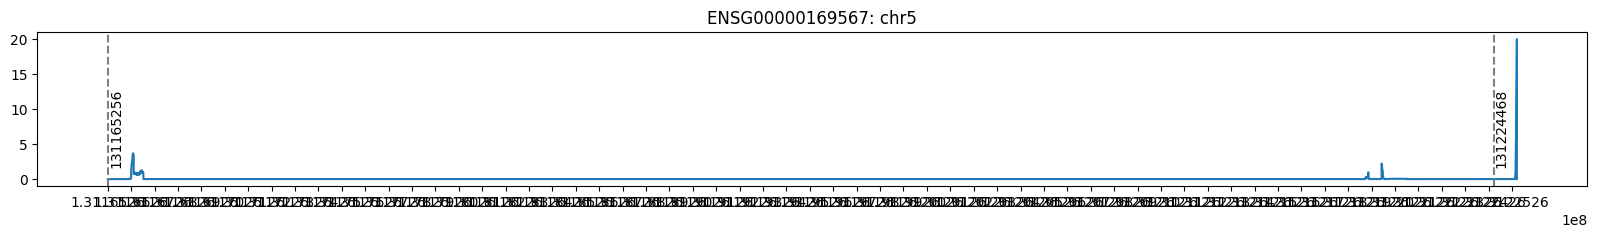

Gene's TSS doesn't exist.

TSSs of ENSG00000170634 unstranded:


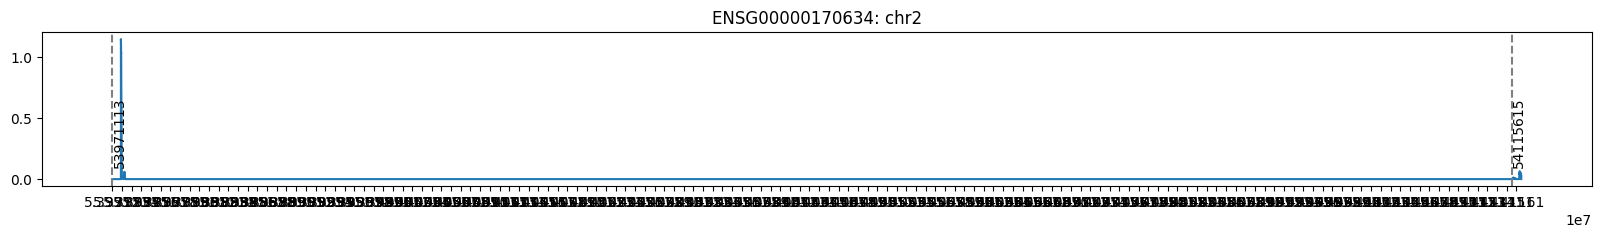

Gene's TSS doesn't exist.

Gene's TSS doesn't exist.

Gene's TSS doesn't exist.

Gene's TSS doesn't exist.

Gene's TSS doesn't exist.

Gene's TSS doesn't exist.

TSSs of ENSG00000185055 unstranded:


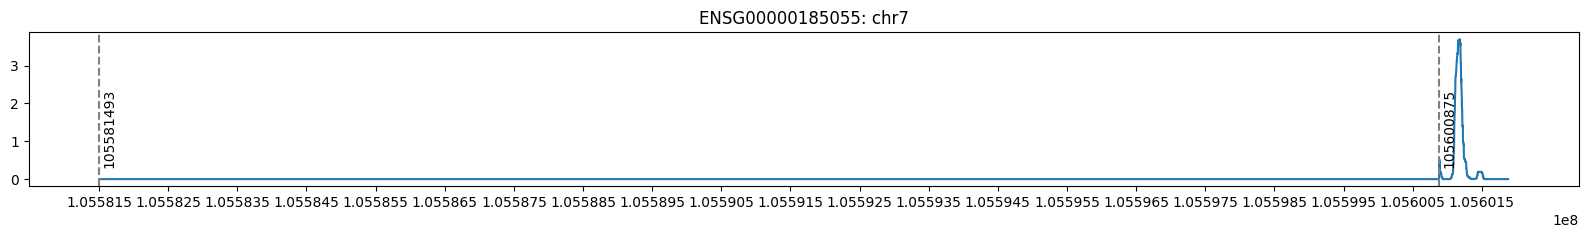

TSSs of ENSG00000088832 unstranded:


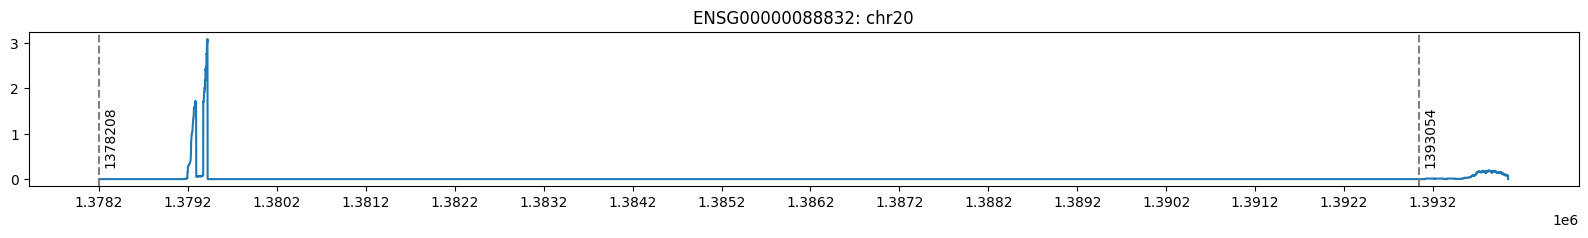

Gene's TSS doesn't exist.

Gene's TSS doesn't exist.

Gene's TSS doesn't exist.

TSSs of ENSG00000170854 unstranded:


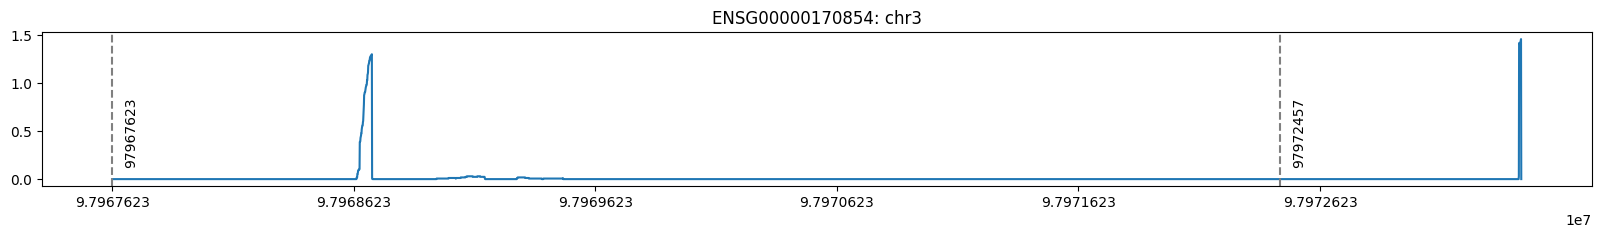

Gene's TSS doesn't exist.

TSSs of ENSG00000103194 unstranded:


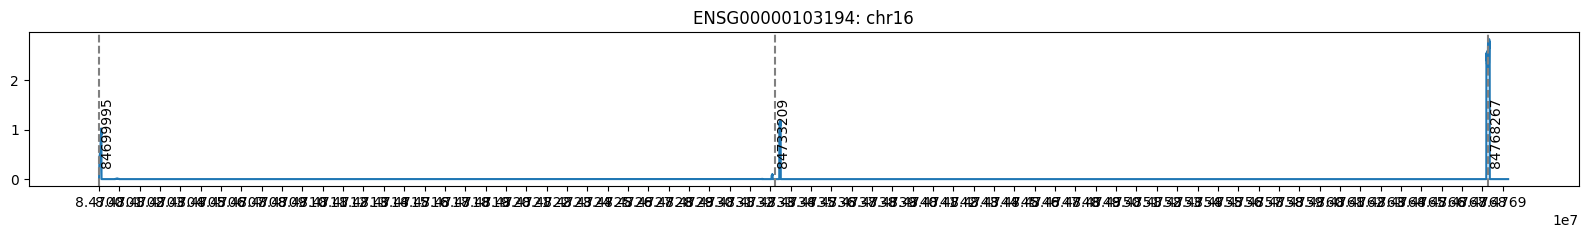

Gene's TSS doesn't exist.

TSSs of ENSG00000133313 unstranded:


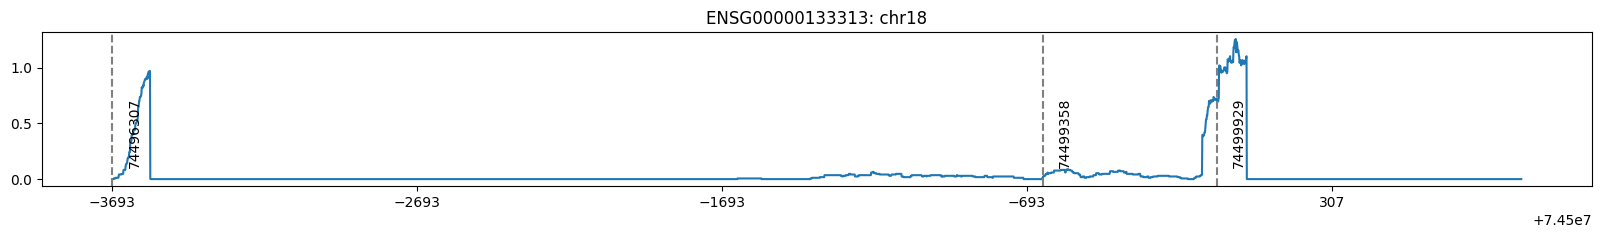

Gene's TSS doesn't exist.

TSSs of ENSG00000291075 unstranded:


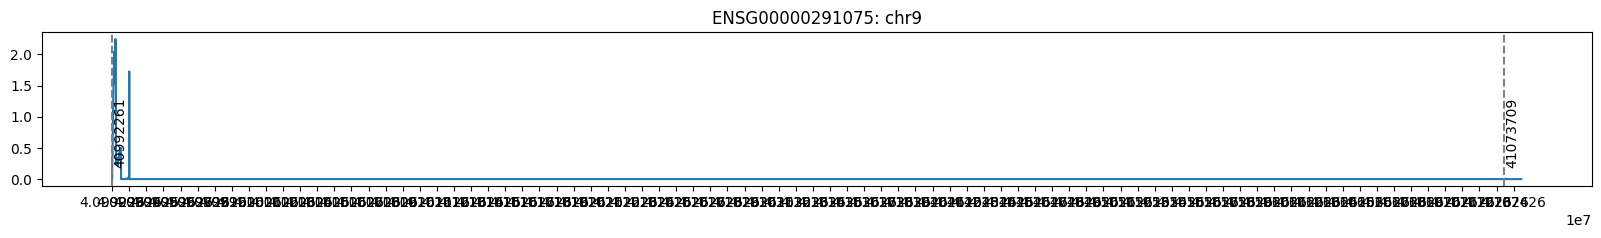

Gene does not exist.

Gene's TSS doesn't exist.

TSSs of ENSG00000053770 unstranded:


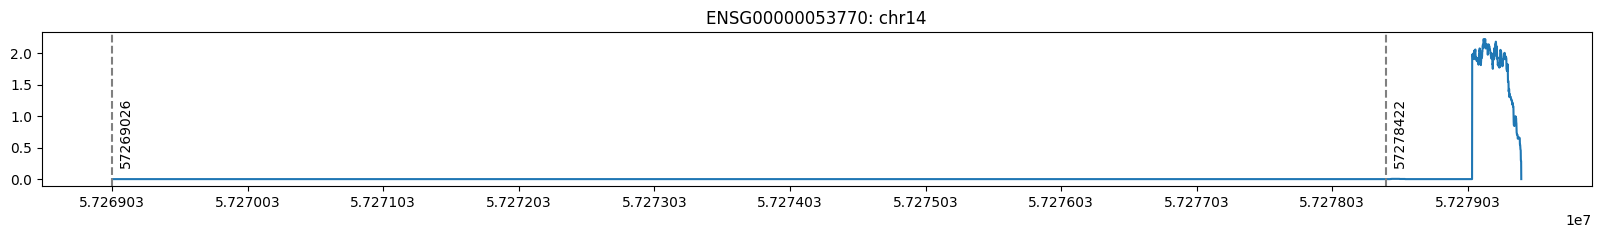

TSSs of ENSG00000173436 unstranded:


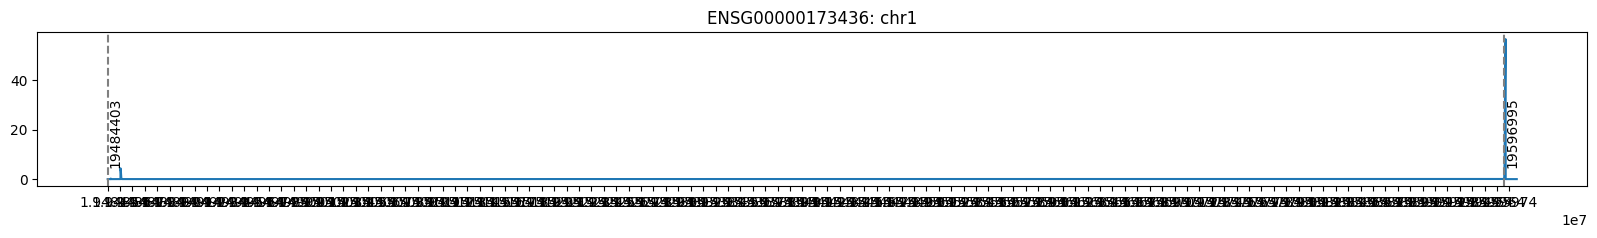

Gene's TSS doesn't exist.

Gene's TSS doesn't exist.

TSSs of ENSG00000135218 unstranded:


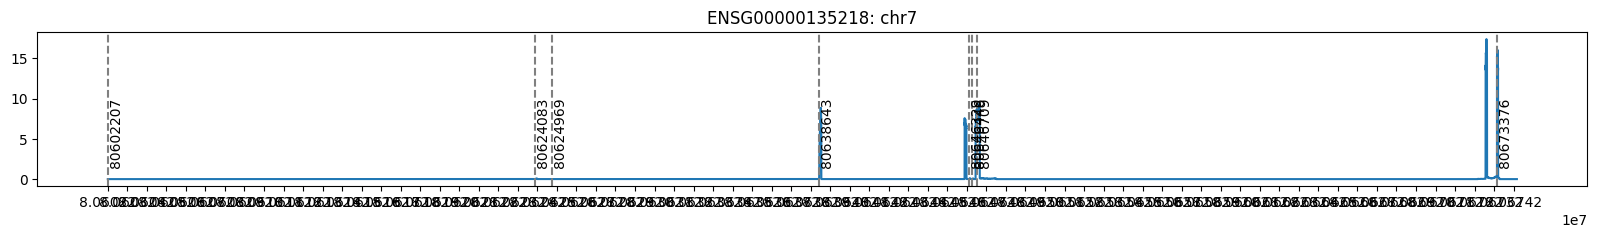

Gene's TSS doesn't exist.

Gene's TSS doesn't exist.

Gene's TSS doesn't exist.

Gene's TSS doesn't exist.

TSSs of ENSG00000198242 unstranded:


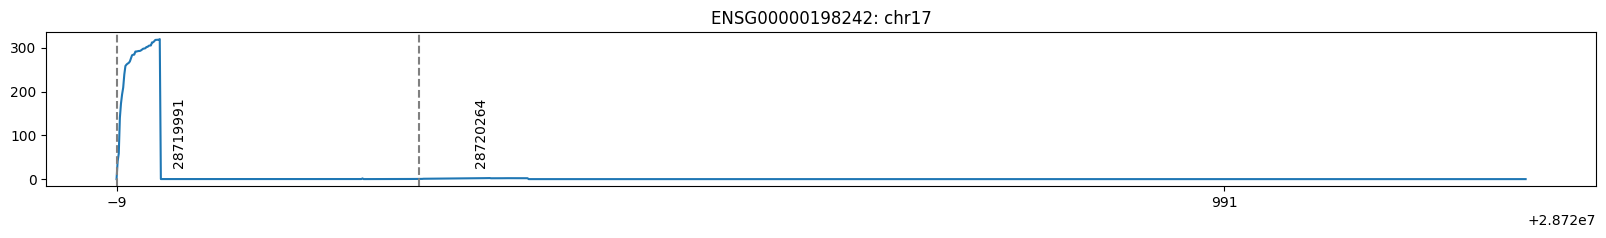

Gene's TSS doesn't exist.

Gene's TSS doesn't exist.

Gene's TSS doesn't exist.

TSSs of ENSG00000125611 unstranded:


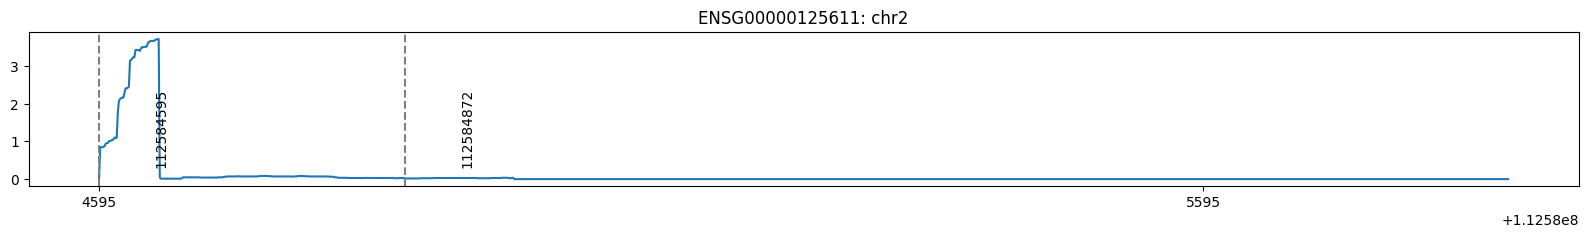

Gene's TSS doesn't exist.

Gene's TSS doesn't exist.

Gene's TSS doesn't exist.

Gene's TSS doesn't exist.

Gene's TSS doesn't exist.

Gene's TSS doesn't exist.

Gene's TSS doesn't exist.

Gene's TSS doesn't exist.

Gene's TSS doesn't exist.



In [10]:
for gene in gene_list[0:100]:
    try:
        chrom = k5_enhancer_genes[k5_enhancer_genes["TargetGeneEnsembl_ID"].str.contains(gene)][["chr"]].drop_duplicates().iloc[0, 0]
    except IndexError:
        print("Gene does not exist.\n")
        continue
    multi_tss(rna_dict, k5_enhancer_genes, gene, chrom)